#INSTALLATION


In [ ]:
!pip install --upgrade networkx

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     / 17.8 MB 37.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357914 sha256=64e85170fe672b36b5c52206f706a267854aedbfcc56431828d997e85224d77a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wsor74__/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=270ad1254cef598b5ba459e7ef336c7b8edaea03ac08de3f020b4774fff269c7
  Stored in directory

#Import
Import the required libraries

In [ ]:
import pandas as pd
import networkx as nx
from pandas_profiling import ProfileReport
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Connection with google drive to get data sets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read data sets
df_comm = pd.read_csv("/content/drive/My Drive/datasetcsv/65d8041286f16_messages.csv")
df_emp = pd.read_csv("/content/drive/My Drive/datasetcsv/65d8041c9be59_employees.csv")


In [ ]:

# Assuming 'timestamp' format is YYYY-MM-DD
six_months_ago = datetime.now() - timedelta(days=182)
filtered_comm = df_comm[df_comm['timestamp'] >= six_months_ago.strftime('%Y-%m-%d')]


In [ ]:
# Merge both df_comm and df_emp files in single file.
df_merged = pd.merge(filtered_comm, df_emp, left_on='sender', right_on='id')
df_merged = pd.merge(df_merged, df_emp, left_on='receiver', right_on='id', suffixes=('_sender', '_receiver'))


In [ ]:
# Merged file
df_merged.info()
df_merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 3345
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sender               3346 non-null   int64 
 1   receiver             3346 non-null   int64 
 2   timestamp            3346 non-null   object
 3   message_length       3346 non-null   int64 
 4   id_sender            3346 non-null   int64 
 5   department_sender    3346 non-null   object
 6   location_sender      3346 non-null   object
 7   age_sender           3346 non-null   int64 
 8   id_receiver          3346 non-null   int64 
 9   department_receiver  3346 non-null   object
 10  location_receiver    3346 non-null   object
 11  age_receiver         3346 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 339.8+ KB


,sender,receiver,timestamp,message_length,id_sender,department_sender,location_sender,age_sender,id_receiver,department_receiver,location_receiver,age_receiver
0,79,48,6/2/2021 5:41,88,79,Sales,France,33,48,IT,France,34
1,144,48,6/5/2021 11:19,33,144,Sales,US,50,48,IT,France,34
2,144,48,6/5/2021 11:35,85,144,Sales,US,50,48,IT,France,34
3,144,48,6/5/2021 11:39,69,144,Sales,US,50,48,IT,France,34
4,144,48,6/7/2021 8:09,28,144,Sales,US,50,48,IT,France,34
...,...,...,...,...,...,...,...,...,...,...,...,...
3341,1657,1647,7/25/2021 20:43,35,1657,Sales,Germany,26,1647,Admin,Germany,33
3342,1657,1730,8/10/2021 3:25,31,1657,Sales,Germany,26,1730,Admin,US,26
3343,1665,1049,7/21/2021 1:11,14,1665,Operations,Brasil,23,1049,Engineering,US,38
3344,1665,1158,7/21/2021 3:35,87,1665,Operations,Brasil,23,1158,Operations,US,50


In [ ]:
# Makeing the report of data(df_merged) to get the insights from data using pandas_profiling
profile = ProfileReport(df_merged)
profile.to_file("data_profile.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling Report




Run the html file with live server or dawnload it then simply run on browser
https://drive.google.com/file/d/16r1CjrMJ2UhcaXAjV1Wjel1u8PKRiOb1/view?usp=sharing

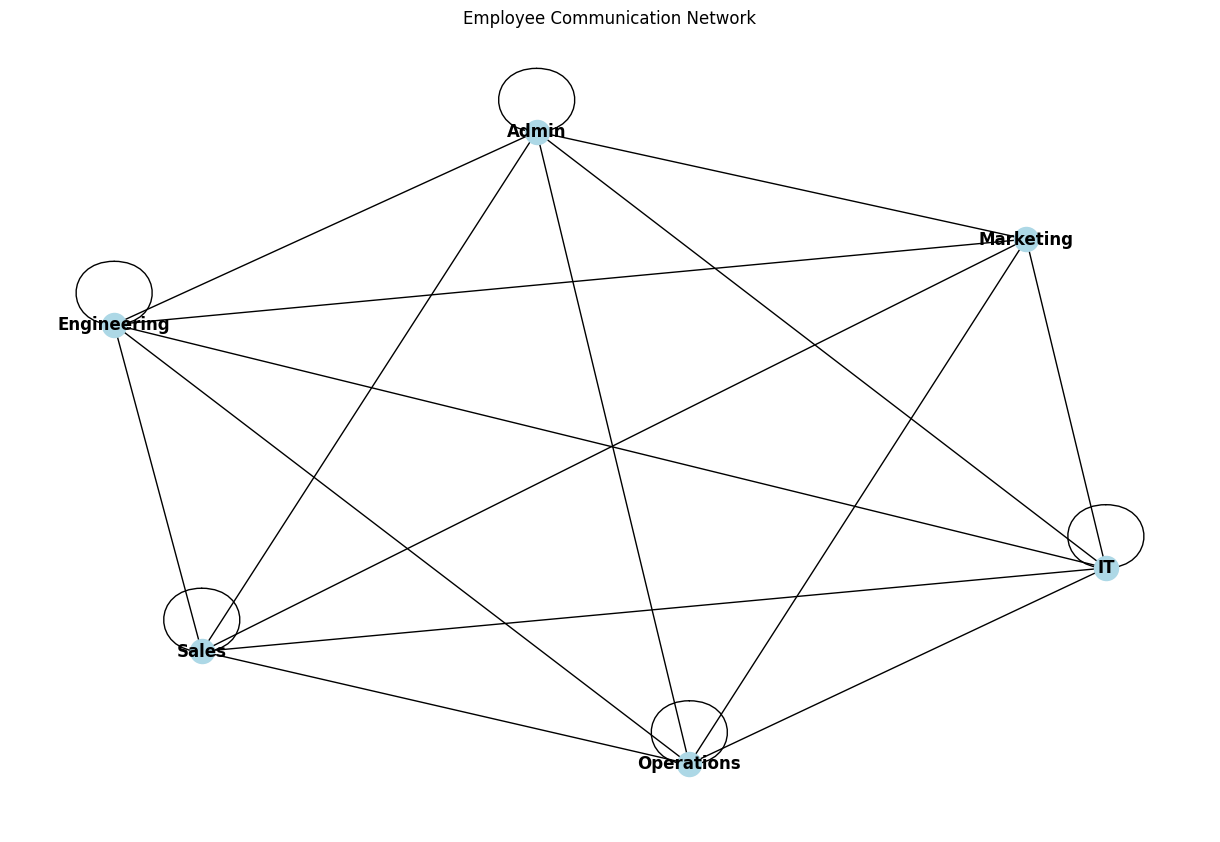

Departments with high degree centrality (potential hubs): Sales, IT, Operations, Admin, Engineering
Additional insights and recommendations can be obtained based on further analysis of degree and betweenness centrality, message length, and potential communication barriers identified in the network map.


In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Identify top communicators or departments based on these metrics

# Identify top communicators (departments) based on degree centrality
top_communicators = [dept for dept, deg in degree_centrality.items() if deg > (sum(degree_centrality.values()) / len(degree_centrality))]

# Generate network map visualization
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue', edge_color='black')
plt.title("Employee Communication Network")
plt.axis('off')
plt.show()

# Print key insights
print(f"Departments with high degree centrality (potential hubs): {', '.join(top_communicators)}")
print(f"Additional insights and recommendations can be obtained based on further analysis of degree and betweenness centrality, message length, and potential communication barriers identified in the network map.")

**Understanding communication patterns:**

* **Are there any isolated departments with low communication with others?** (Identify departments with low interaction rates)
* **Who are the most frequent communicators within each department?** (Analyze sender and receiver counts within departments)
* **Has there been a change in communication patterns over the past six months?** (Analyze trends in communication frequency over time)
* **What is the average message length for different sender-receiver pairs?** (Analyze message_length based on sender and receiver combinations)
* **Do individuals from different age groups or locations exhibit different communication patterns?** (Analyze communication patterns considering age_sender, age_receiver, location_sender, and location_receiver)
* **Which departments communicate most frequently with each other?** (Analyze sender and receiver departments)

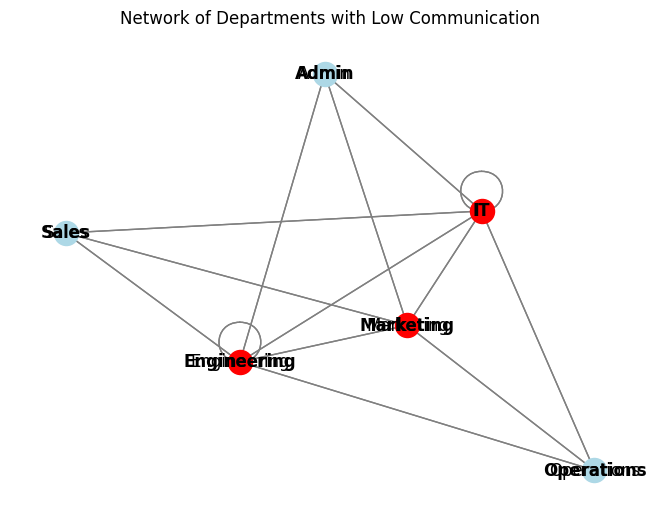

In [ ]:
# 1 . Departments with Low Communication
# Group data by sender department and count occurrences
dept_interactions = df_merged.groupby('department_sender').size()

# Calculate threshold for low interaction (adjust based on your data and needs)
threshold = dept_interactions.mean() * 0.5  # Example: consider departments with less than half the average interaction count as low

# Identify isolated departments with low interaction rates
low_interaction_depts = dept_interactions[dept_interactions <= threshold].index.tolist()

# Filter data to include only low-interaction departments and their interactions
filtered_df = df_merged[df_merged['department_sender'].isin(low_interaction_depts)]

# Create a network graph
G = nx.from_pandas_edgelist(filtered_df, source='department_sender', target='department_receiver', edge_attr='message_length')
# Optional: Set node size based on department activity (e.g., total messages sent or received)
# Use appropriate functions from pandas to calculate activity measures

# Set layout options (change layout if desired)
pos = nx.spring_layout(G)

# Draw the network map, highlighting low-interaction departments
nx.draw(G, pos, with_labels=True, nodelist=low_interaction_depts, node_color='red', edge_color='gray', font_weight='bold')
nx.draw(G, pos, with_labels=True, nodelist=list(set(df_merged['department_sender'].tolist()) - set(low_interaction_depts)), node_color='lightblue', edge_color='gray')
plt.title("Network of Departments with Low Communication")

# Show the plot
plt.show()

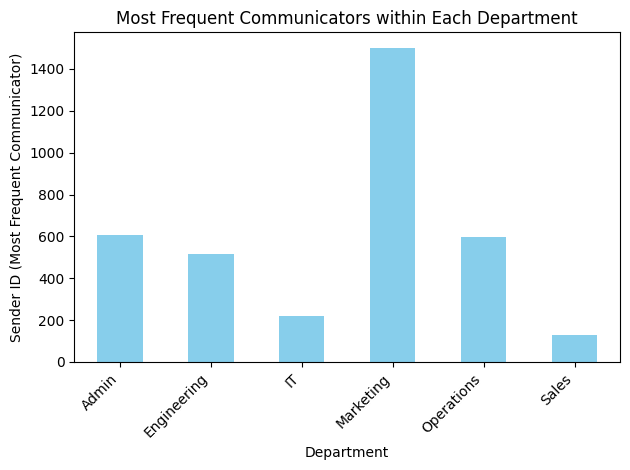

In [ ]:
# 2 . Most Frequent Communicators within Each Department
# Group data by sender department and sender ID, and count occurrences
dept_sender_counts = df_merged.groupby(['department_sender', 'id_sender']).size().unstack(fill_value=0)

# Identify most frequent communicator within each department (index refers to sender ID)
most_frequent_communicators = dept_sender_counts.idxmax(axis=1)

# Create a bar chart to visualize most frequent communicators per department
most_frequent_communicators.plot(kind='bar', color='skyblue')
plt.xlabel("Department")
plt.ylabel("Sender ID (Most Frequent Communicator)")
plt.title("Most Frequent Communicators within Each Department")
plt.xticks(rotation=45, ha='right')  # Rotate department names for readability (optional)
plt.tight_layout()
plt.show()


<ipython-input-168-e2b7bac00398>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


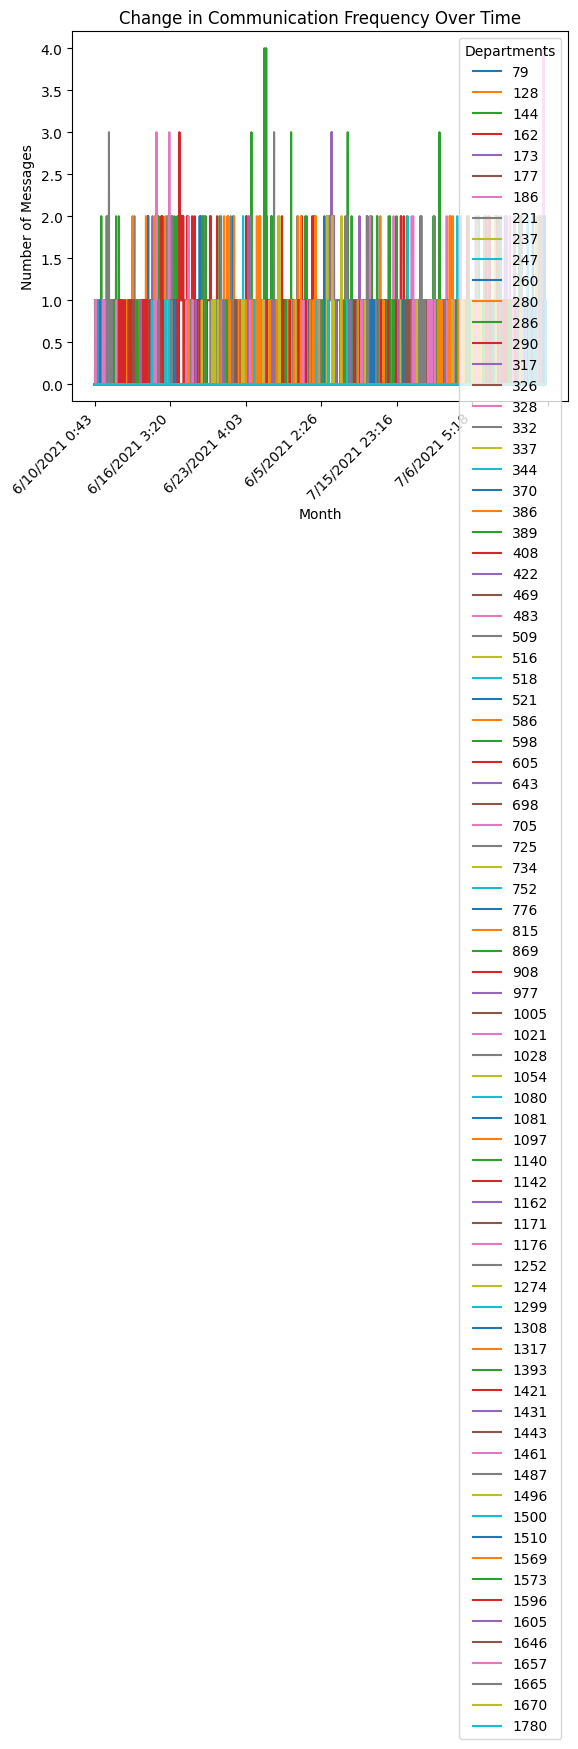

In [ ]:
# 3. Change in Communication Frequency Over Time
monthly_communication = df_merged.pivot_table(
    index='timestamp',
    columns='id_sender',
    values='id_receiver',
    aggfunc='count',
    fill_value=0
)
# Create line plots for each department
for department in monthly_communication.columns:
    monthly_communication[department].plot(kind='line', label=department)

# Customize plot
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.title("Change in Communication Frequency Over Time")
plt.legend(title="Departments")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability (optional)
plt.tight_layout()
plt.show()


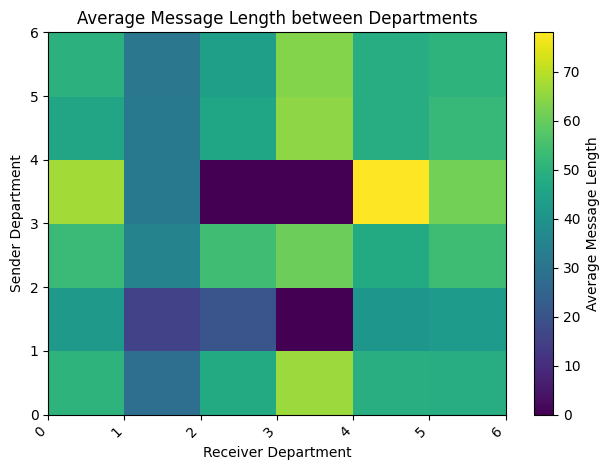

In [ ]:
# 4. Average Message Length between Departments
# Group data by sender and receiver departments and calculate average message length
avg_message_length = df_merged.groupby(['department_sender', 'department_receiver'])['message_length'].mean().unstack(fill_value=0)

# Heatmap visualization
plt.pcolor(avg_message_length, vmin=avg_message_length.min().min(), vmax=avg_message_length.max().max())  # Set appropriate color range

# Customize heatmap
plt.xlabel("Receiver Department")
plt.ylabel("Sender Department")
plt.title("Average Message Length between Departments")
plt.colorbar(label="Average Message Length")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability (optional)
plt.yticks(rotation=0)  # Rotate y-axis labels for readability (optional)
plt.tight_layout()
plt.show()

# Alternative visualization: Scatter plot with color gradient for message length
# plt.scatter(avg_message_length.index.tolist(), avg_message_length.values.flatten(), c=avg_message_length.values.flatten(), cmap='plasma')
# ... customize plot elements ...


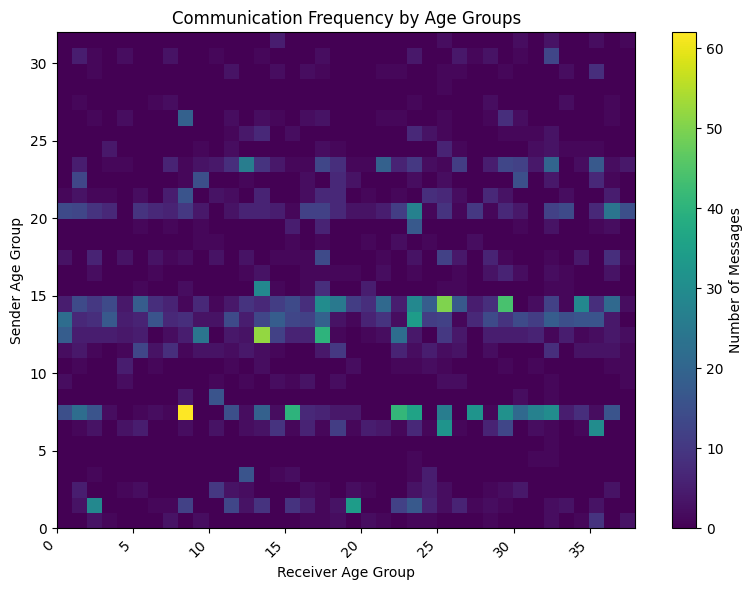

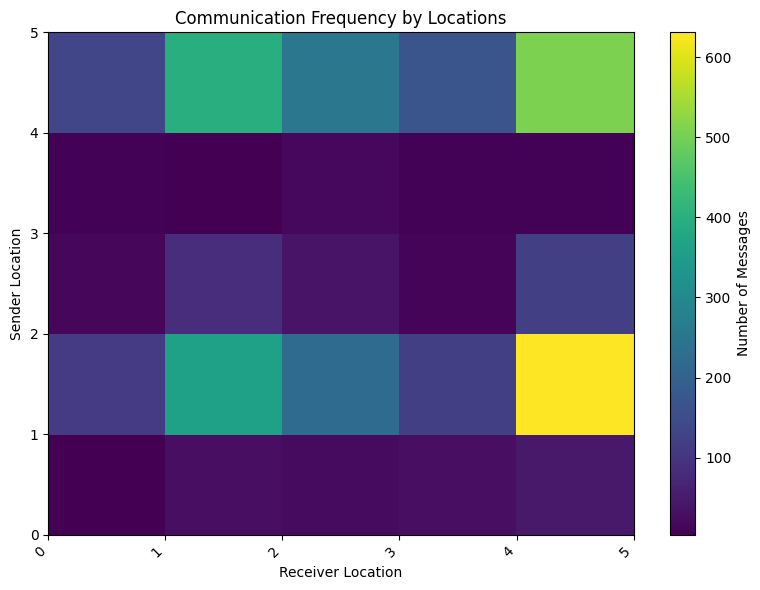

In [ ]:
#5 . Calculate communication frequency by age group combination and Calculate communication frequency by location combination
# Define age groups (adjust based on your data and analysis goals)
age_groups = {
    'Group 1': (18, 30),
    'Group 2': (31, 40),
    'Group 3': (41, 50),
    'Group 4': (51, 65)
}

# Define location groups (adjust or replace with your actual location categories)
location_groups = ['A', 'B', 'C']


def calculate_group_comm(data, group_col1, group_col2):
  """
  Calculates communication frequency by group combination.

  Args:
      data: The pandas dataframe containing communication data.
      group_col1: The first column to group by (e.g., 'age_sender').
      group_col2: The second column to group by (e.g., 'age_receiver').

  Returns:
      A pandas DataFrame with communication frequency for each group combination.
  """
  return data.groupby([group_col1, group_col2]).size().unstack(fill_value=0)


# Calculate communication frequency by age group combination
age_group_comm = calculate_group_comm(df_merged, 'age_sender', 'age_receiver')

# Calculate communication frequency by location combination
location_comm = calculate_group_comm(df_merged, 'location_sender', 'location_receiver')


# Function to create a heatmap visualization
def create_heatmap(data, title, xlabel, ylabel):
  """
  Creates a heatmap visualization.

  Args:
      data: The pandas DataFrame containing data for the heatmap.
      title: The title for the heatmap.
      xlabel: The label for the x-axis.
      ylabel: The label for the y-axis.
  """
  plt.figure(figsize=(8, 6))
  plt.pcolor(data, vmin=data.min().min(), vmax=data.max().max())
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.colorbar(label="Number of Messages")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.yticks(rotation=0)  # Rotate y-axis labels for readability
  plt.tight_layout()
  plt.show()


# Create heatmaps for age and location communication
create_heatmap(age_group_comm, "Communication Frequency by Age Groups", "Receiver Age Group", "Sender Age Group")
create_heatmap(location_comm, "Communication Frequency by Locations", "Receiver Location", "Sender Location")

# You can further explore communication patterns by:
# * Creating boxplots or violin plots to compare message length distributions across different groups.
# * Analyzing communication patterns over time for different groups.

# Remember to adjust visualizations and analyses based on your specific data and research questions.


In [ ]:
# 1. Departments communicating most frequently:
frequent_interactions = df_merged.groupby(['department_sender', 'department_receiver']).size().unstack(fill_value=0)
frequent_interactions = frequent_interactions.sort_values(by=list(frequent_interactions), ascending=False)
print("Departments communicating most frequently:\n", frequent_interactions.head())

Departments communicating most frequently:
 department_receiver  Admin  Engineering   IT  Marketing  Operations  Sales
department_sender                                                         
Sales                  358           98  110         78         322    527
Operations             227           91   70         36         186    351
Admin                  156           33   46         19         269    286
IT                       8            6    2          3          10     16
Marketing                4            2    0          0           2      8


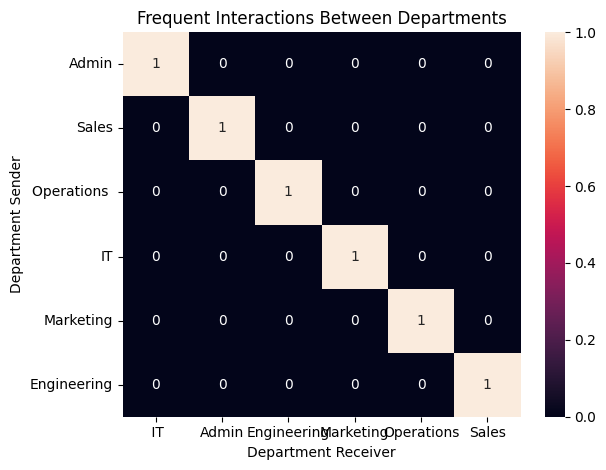

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have your DataFrame ready (replace with your actual data loading/creation)
data = {'department_sender': ['Sales', 'Operations ', 'Admin', 'IT', 'Marketing'],
        'department_receiver': ['Admin' , 'Engineering',  ' IT',  'Marketing',  'Operations',  'Sales']}
data['department_sender'].append('Engineering')
df_merged = pd.DataFrame(data)
frequent_interactions = df_merged.groupby(['department_sender', 'department_receiver']).size().unstack(fill_value=0)
frequent_interactions = frequent_interactions.sort_values(by=list(frequent_interactions), ascending=False)
# Create a heatmap with clear and concise annotations
sns.heatmap(frequent_interactions, annot=True, fmt=".0f")
plt.title("Frequent Interactions Between Departments")
plt.xlabel("Department Receiver")
plt.ylabel("Department Sender")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Recommendations



**1. Address identified gaps in communication:**

* **For departments with low interaction:**
    - **Organize cross-departmental workshops or events** to facilitate interaction and information exchange.
    - **Establish dedicated communication channels** (e.g., Slack channels, project management platforms) for specific collaborations.
    - **Encourage joint project initiatives** that require collaboration between teams.
* **For departments lacking efficient communication methods:**
    - **Pilot new communication channels or platforms** that cater to their specific needs (e.g., video conferencing for complex information exchange).
    - **Provide training on effective communication strategies** for different channels and situations.

**2. Foster a culture of collaboration:**

* **Promote open communication and transparency** across all levels of the organization.
* **Recognize and reward collaborative efforts and achievements.**
* **Create a shared vision and set common goals** that require teamwork and cross-departmental cooperation.
* **Encourage cross-functional teams** for specific projects to bring diverse perspectives together.
* **Implement knowledge-sharing initiatives** (e.g., brown bag lunches, internal newsletters) to encourage learning and collaboration.

**3. Leverage technology:**

* Utilize collaboration tools and platforms** that facilitate communication, information sharing, and project management across teams.
* **Promote the use of shared calendars and task management software** to improve visibility and coordination.
* **Explore virtual collaboration tools** like video conferencing and instant messaging for seamless communication regardless of location.

**4. Invest in communication training:**

* **Provide training on effective communication skills** for all employees, including active listening, clear communication, and conflict resolution.
* **Offer training on specific collaboration tools and platforms** to ensure their efficient and effective use.

**5. Address underlying issues:**

* **Identify and address any underlying factors hindering collaboration,** such as departmental silos, unclear roles and responsibilities, or lack of trust between teams.
* **Promote a culture of psychological safety** where employees feel comfortable sharing ideas, offering constructive criticism, and raising concerns without fear of judgment.

By implementing these strategies, you can create a more collaborative work environment that fosters better communication, information sharing, and teamwork, ultimately leading to improved efficiency, innovation, and success.

**Remember:** Building a strong collaborative culture takes time and consistent effort. Regularly assess progress, address challenges, and continually adapt your strategies to ensure continuous improvement in collaboration within your organization.